# Life Expectancy Prediction - Initial Data Exploration

Starting exploration of the WHO life expectancy dataset for regression task.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
df = pd.read_csv(r"C:\Users\nicol\life_expectancy_task\data\Life Expectancy - Life Expectancy (1).csv")
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (2497, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Hungary,2009,Developed,74.2,162.0,0,11.46,1281.155944,NaN,1,...,99.0,7.55,99.0,0.1,12967.165430,12265.0,1.8,1.8,0.816,15.3
1,Singapore,2010,Developed,82.0,61.0,0,1.84,4540.543752,96.0,50,...,96.0,3.96,96.0,0.1,46569.679510,NaN,2.1,2.1,0.889,14.5
2,New Zealand,2008,Developed,81.0,75.0,0,9.49,6761.288966,9.0,0,...,89.0,1.70,89.0,0.1,31287.778650,NaN,0.3,0.3,0.894,19.5
3,Honduras,2000,Developing,71.0,174.0,6,2.61,28.808311,93.0,0,...,88.0,6.63,94.0,1.7,188.783165,6524283.0,2.8,2.7,0.551,9.8
4,Egypt,2002,Developing,68.7,177.0,61,0.15,0.000000,97.0,653,...,97.0,5.97,97.0,0.1,NaN,NaN,3.4,3.4,0.617,11.2


In [10]:
# Basic info about the dataset
print("Dataset Info:")
df.info()
print("\nColumn names:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2497 non-null   object 
 1   Year                             2497 non-null   int64  
 2   Status                           2497 non-null   object 
 3   Life expectancy                  2488 non-null   float64
 4   Adult Mortality                  2488 non-null   float64
 5   infant deaths                    2497 non-null   int64  
 6   Alcohol                          2333 non-null   float64
 7   percentage expenditure           2497 non-null   float64
 8   Hepatitis B                      2016 non-null   float64
 9   Measles                          2497 non-null   int64  
 10  BMI                              2466 non-null   float64
 11  under-five deaths                2497 non-null   int64  
 12  Polio 

In [11]:
# Number of missing values in each column of dataset
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Life expectancy                      9
Adult Mortality                      9
Alcohol                            164
Hepatitis B                        481
BMI                                 31
Polio                               16
Total expenditure                  191
Diphtheria                          16
GDP                                365
Population                         540
thinness  1-19 years                31
thinness 5-9 years                  31
Income composition of resources    141
Schooling                          137
dtype: int64


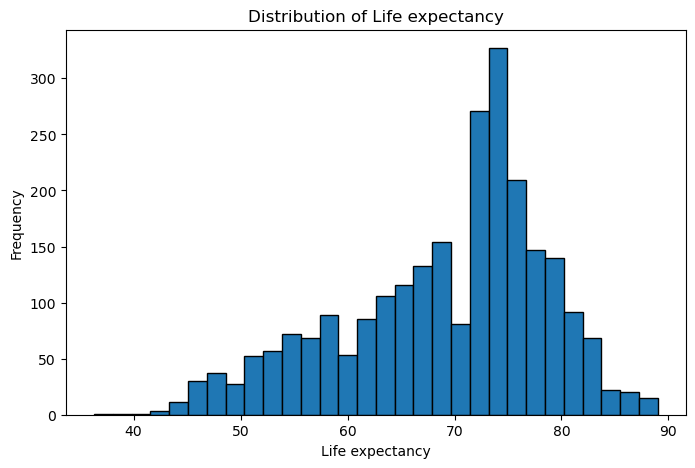

In [12]:
#check life expectancy distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["Life expectancy"], bins=30, edgecolor='k')
plt.title("Distribution of Life expectancy")
plt.xlabel("Life expectancy")
plt.ylabel("Frequency")
plt.show()


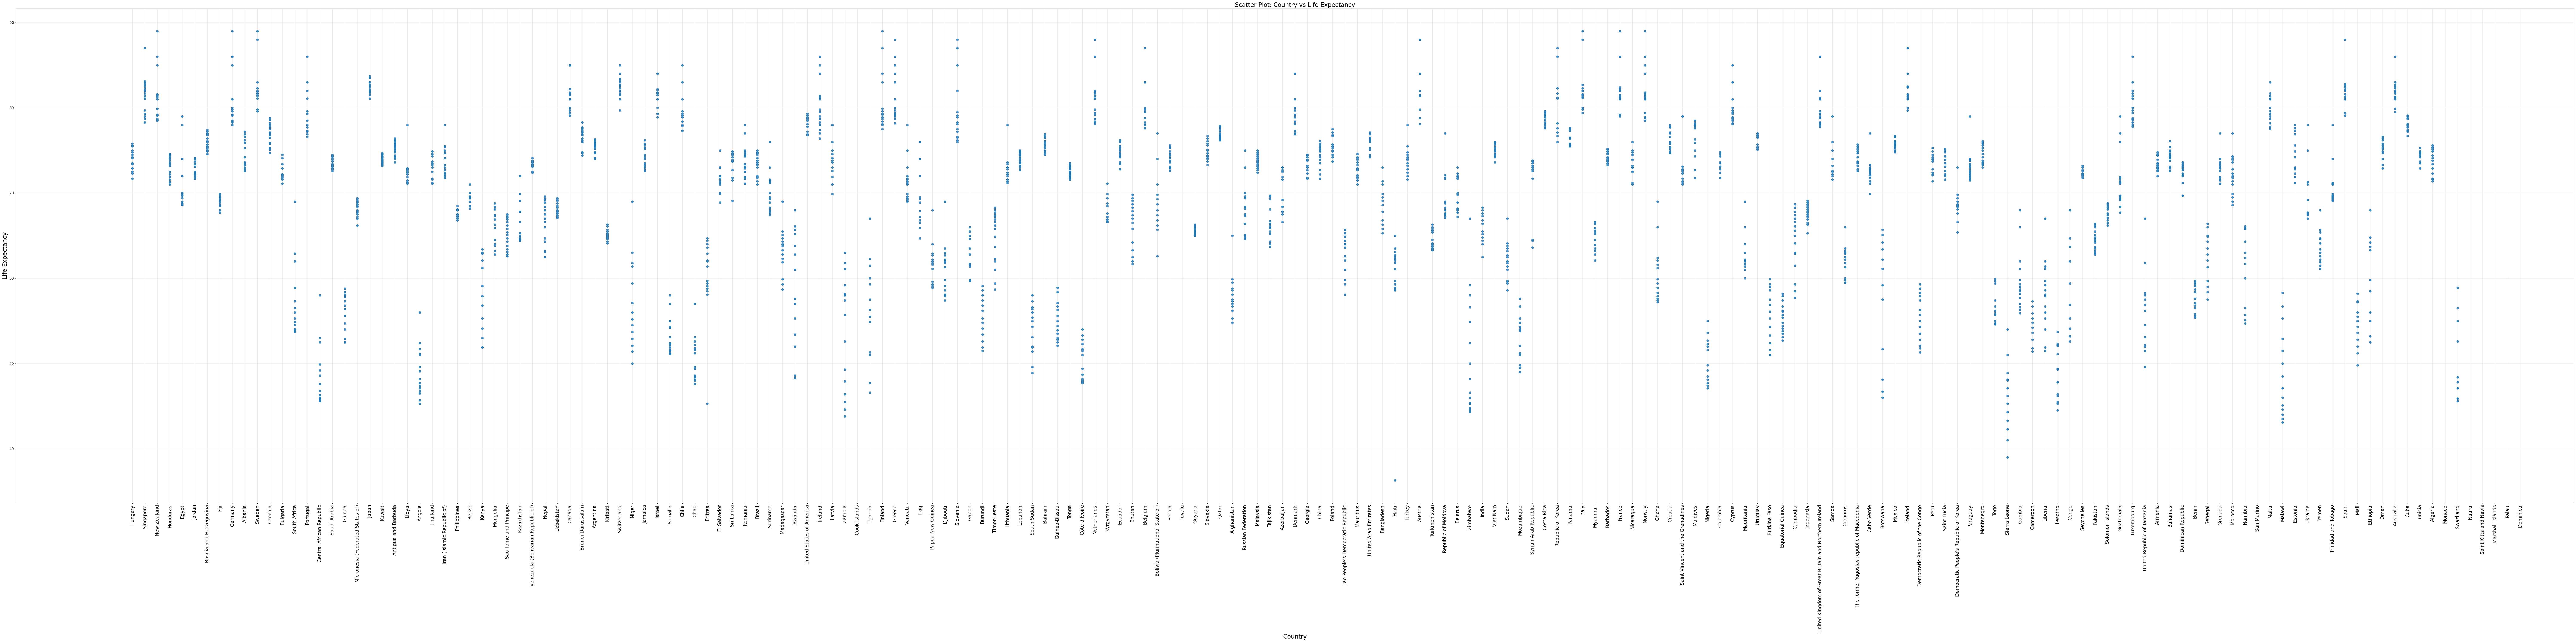

In [13]:
#check Life Expectancy wrt Country name
import matplotlib.pyplot as plt

# Map country names to integers for plotting
country_codes = {c: i for i, c in enumerate(df["Country"].unique())}
df["Country_Code"] = df["Country"].map(country_codes)

plt.figure(figsize=(120, 30))  # Even bigger
plt.scatter(df["Country_Code"], df["Life expectancy"], alpha=0.9, s=50)

# Ticks with country names
plt.xticks(list(country_codes.values()), list(country_codes.keys()), rotation=90, fontsize=16)
plt.yticks(fontsize=12)
plt.title("Scatter Plot: Country vs Life Expectancy", fontsize=20)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Life Expectancy", fontsize=20)

# Add grid for better readability
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
#Explore categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Detected categorical columns: {len(categorical_cols)}")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  - {col:20s}: {unique_count:4d} unique values")
    
print(f"\nNumerical columns: {len(numerical_cols)}")
for col in numerical_cols:
    print(f"  - {col:20s}: range {df[col].min():.1f} - {df[col].max():.1f}")

Detected categorical columns: 2
  - Country             :  192 unique values
  - Status              :    2 unique values

Numerical columns: 21
  - Year                : range 2000.0 - 2015.0
  - Life expectancy     : range 36.3 - 89.0
  - Adult Mortality     : range 1.0 - 723.0
  - infant deaths       : range 0.0 - 1800.0
  - Alcohol             : range 0.0 - 17.9
  - percentage expenditure: range 0.0 - 19479.9
  - Hepatitis B         : range 1.0 - 99.0
  - Measles             : range 0.0 - 212183.0
  - BMI                 : range 1.4 - 87.3
  - under-five deaths   : range 0.0 - 2500.0
  - Polio               : range 3.0 - 99.0
  - Total expenditure   : range 0.4 - 17.6
  - Diphtheria          : range 2.0 - 99.0
  - HIV/AIDS            : range 0.1 - 50.6
  - GDP                 : range 3.7 - 119172.7
  - Population          : range 34.0 - 1293859294.0
  - thinness  1-19 years: range 0.1 - 27.7
  - thinness 5-9 years  : range 0.1 - 28.6
  - Income composition of resources: range 0.0 -

In [16]:
#Get the unique categorical variables 

# Basic statistics
total_count = len(df)
print(f"Total entries: {total_count}")

for col in categorical_cols:
    # Basic statistics
    unique_count = df[col].nunique()
    missing_count = df[col].isnull().sum()
    
    print(f"Unique values: {unique_count}")
    print(f"Missing values: {missing_count} ({missing_count/total_count*100:.1f}%)")
    
    # Value counts
    value_counts = df[col].value_counts()
    print(f"\n=== TOP 15 MOST FREQUENT VALUES ===")
    print(value_counts.head(15))
    

Total entries: 2497
Unique values: 192
Missing values: 0 (0.0%)

=== TOP 15 MOST FREQUENT VALUES ===
Country
Hungary                  16
Vanuatu                  16
Armenia                  16
Sao Tome and Principe    16
Zimbabwe                 16
Chad                     16
Turkmenistan             16
Haiti                    16
Singapore                16
Kuwait                   16
Zambia                   16
Malaysia                 16
Cambodia                 16
Lebanon                  16
Cabo Verde               16
Name: count, dtype: int64
Unique values: 2
Missing values: 0 (0.0%)

=== TOP 15 MOST FREQUENT VALUES ===
Status
Developing    2060
Developed      437
Name: count, dtype: int64


In [17]:
#Explore Categorical Variables corelation with life expectancy
target ='Life expectancy'

for col in categorical_cols:
# Group statistics
    grouped_stats = df.groupby(col)['Life expectancy'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)

 # Sort by mean price
    grouped_stats = grouped_stats.sort_values('mean', ascending=False)
    
    print("-LIFE EXPECTANCY STATISTICS BY CATEGORY ")
    print(grouped_stats.head(10))
    
# Visualizations
plt.figure(figsize=(20, 12))

-LIFE EXPECTANCY STATISTICS BY CATEGORY 
             count   mean  median   std   min   max
Country                                            
Austria         10  82.56   81.75  3.46  78.1  88.0
Sweden          13  82.54   81.70  2.81  79.6  89.0
Japan           14  82.49   82.50  0.80  81.1  83.7
Switzerland     14  82.44   82.45  1.31  79.7  85.0
Italy           13  82.37   81.60  2.90  79.4  89.0
France          12  82.22   81.75  2.76  79.0  89.0
Iceland         12  82.04   81.50  1.95  79.7  87.0
Spain           12  81.94   81.80  2.24  79.1  88.0
Norway          15  81.93   81.30  2.93  78.5  89.0
Australia       14  81.88   81.80  1.54  79.5  86.0
-LIFE EXPECTANCY STATISTICS BY CATEGORY 
            count   mean  median   std   min   max
Status                                            
Developed     437  79.13    79.2  3.89  69.9  89.0
Developing   2051  67.02    68.9  8.99  36.3  89.0


<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

In [18]:
#compare multiple categorical columns in relation with price

comparison_data = {}
    
for col in categorical_cols:
    if col in df.columns:
        clean_data = df[[col, target]].dropna()
        grouped = clean_data.groupby(col)[target].mean()
            
        comparison_data[col] = {
                'unique_values': df[col].nunique(),
                'expectancy_variance': grouped.var(),
                'expectancy_range': grouped.max() - grouped.min(),
                'max_expectancy_category': grouped.idxmax(),
                'min_expectancy_category': grouped.idxmin(),
                'correlation_strength': grouped.std() / grouped.mean() if grouped.mean() > 0 else 0
            }
# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_data).T
comparison_df = comparison_df.sort_values('expectancy_variance', ascending=False)
    
print("-CATEGORICAL COLUMNS COMPARISON")
#print(comparison_df.round(2))  
comparison_df.head()

-CATEGORICAL COLUMNS COMPARISON


,unique_values,expectancy_variance,expectancy_range,max_expectancy_category,min_expectancy_category,correlation_strength
Country,192,84.197473,36.374286,Austria,Sierra Leone,0.13257
Status,2,73.400629,12.116157,Developed,Developing,0.117243


In [19]:
# Compare multiple numerical columns in relation with target variable
comparison_data = {}

print(f"Analyzing correlation with target variable: '{target}'")

for col in numerical_cols:
    if col in df.columns and col != target:  # Don't correlate target with itself
        try:
            clean_data = df[[col, target]].dropna()
            
            if len(clean_data) > 1:  # Need at least 2 data points for correlation
                # Calculate correlation safely
                corr_value = clean_data[col].corr(clean_data[target])
                
                # Handle NaN correlations (e.g., when one variable is constant)
                if pd.isna(corr_value):
                    corr_value = 0.0
                
                comparison_data[col] = {
                    'unique_values': clean_data[col].nunique(),
                    'variance': clean_data[col].var(),
                    'range': clean_data[col].max() - clean_data[col].min(),
                    'mean': clean_data[col].mean(),
                    'std': clean_data[col].std(),
                    'correlation': corr_value,
                    'abs_correlation': abs(corr_value)
                }
            else:
                print(f"Warning: Not enough data for column '{col}' (only {len(clean_data)} valid pairs)")
                
        except Exception as e:
            print(f"Error processing column '{col}': {str(e)}")
            continue

# Create and display comparison DataFrame
if comparison_data:
    comparison_df = pd.DataFrame(comparison_data).T
    comparison_df = comparison_df.sort_values('abs_correlation', ascending=False)
    
    print("\nNUMERICAL COLUMNS COMPARISON")
    
    display(comparison_df.round(4))
    
else:
    print("No numerical data available for comparison")

Analyzing correlation with target variable: 'Life expectancy'

NUMERICAL COLUMNS COMPARISON


,unique_values,variance,range,mean,std,correlation,abs_correlation
Schooling,172.0,1.133190e+01,2.070000e+01,1.196750e+01,3.366300e+00,0.7559,0.7559
Income composition of resources,617.0,4.550000e-02,9.480000e-01,6.249000e-01,2.132000e-01,0.7263,0.7263
Adult Mortality,411.0,1.539585e+04,7.220000e+02,1.646475e+02,1.240800e+02,-0.6902,0.6902
BMI,584.0,4.003748e+02,7.620000e+01,3.800700e+01,2.000940e+01,0.5634,0.5634
HIV/AIDS,181.0,2.407220e+01,5.050000e+01,1.705000e+00,4.906300e+00,-0.5594,0.5594
Diphtheria,81.0,5.712333e+02,9.700000e+01,8.224350e+01,2.390050e+01,0.4851,0.4851
thinness 1-19 years,190.0,1.915500e+01,2.760000e+01,4.829500e+00,4.376600e+00,-0.4768,0.4768
thinness 5-9 years,200.0,2.012110e+01,2.850000e+01,4.874200e+00,4.485700e+00,-0.4707,0.4707
Polio,73.0,5.611686e+02,9.600000e+01,8.242350e+01,2.368900e+01,0.4677,0.4677
GDP,2127.0,2.004432e+08,1.191691e+05,7.361176e+03,1.415780e+04,0.4621,0.4621


## Initial Questions:
- What is the target variable? (Life expectancy)
- How many countries and years are covered?
- Are there missing values?

## TODO:
- Analyze missing data patterns
- Explore health indicators
- Check economic factors correlation
- Handle categorical variables